In [20]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

allowed_color = 'Green'
polylog_color = 'Black'
noyhat_color = 'Orange'
giantstep_color = 'Blue'
notallowed_color = 'Red'
processnotdefined_color = 'Purple'
sweetspot_color = 'cyan'

In [21]:
from giant_learning.poly_poly import SphericalH3H3Overlaps
from giant_learning.gradient_descent import SphericalGradientDescent

import numpy as np
from sklearn.preprocessing import normalize
from scipy.linalg import orth

p = 1
k = 1
ds = np.array([128,256,512])
T = 5000
# T = 3
noise = 1e-6
ts = 1./np.sqrt(ds)  
seeds = 10
npower = 3/2

target = SphericalH3H3Overlaps._target
activation = SphericalH3H3Overlaps._activation
activation_derivative = SphericalH3H3Overlaps._activation_derivative


sim_plainsgd_test_errors = np.zeros((len(ds),seeds,T+1))
sim_correlationsgd_test_errors = np.zeros((len(ds),seeds,T+1))
sim_adaptivesgd_test_errors = np.zeros((len(ds),seeds,T+1))
theo_plainsgd_test_errors = np.zeros((len(ds),seeds,T+1))
theo_correlationsgd_test_errors = np.zeros((len(ds),seeds,T+1))
theo_adaptivesgd_test_errors = np.zeros((len(ds),seeds,T+1))

for i,d,t in zip(range(len(ds)),ds,ts):
    for seed in range(seeds):
        n = int(d**npower)
        gamma = .05*n*np.power(d,-3/2)
        ## Initial conditions
        rng = np.random.default_rng(seed^d)
        Wtarget = orth((normalize(rng.normal(size=(k,d)), axis=1, norm='l2')).T).T
        Wtild = normalize(rng.normal(size=(p,d)), axis=1, norm='l2')
        Wtild_target = np.einsum('ji,ri,rh->jh', Wtild , Wtarget ,Wtarget)
        W0_orth =  normalize(Wtild - Wtild_target, axis=1, norm='l2')
        W0 = (t*normalize(Wtild_target,norm='l2',axis=1) + np.sqrt(1-t**2)*W0_orth)
        

        P = Wtarget @ Wtarget.T
        M0 = W0 @ Wtarget.T
        Q0 = W0 @ W0.T

        print(f'P = {P}')
        print(f'M0 = {M0}')
        print(f'Q0 = {Q0}')
        a0 = np.sign(M0[0][0])*np.ones(p) ### It is changed with the new version of the package. The 1/p is included in giant-learning ###

        gd_plain = SphericalGradientDescent(
            target, Wtarget, n,
            activation, W0, a0, activation_derivative,
            gamma, noise, predictor_interaction=True,
            test_size = None, analytical_error= 'H3H3'
        )

        gd_corr = SphericalGradientDescent(
            target, Wtarget, n,
            activation, W0, a0, activation_derivative,
            gamma, noise, predictor_interaction=False,
            test_size = None, analytical_error= 'H3H3',
        )

        gd_plain.train(T, verbose = True)
        gd_corr.train(T, verbose = True)

        sim_plainsgd_test_errors[i,seed,:] = np.array(gd_plain.test_errors)
        sim_correlationsgd_test_errors[i,seed,:] = np.array(gd_corr.test_errors)


np.savez(f'simulations_T{T}_n{npower}_seeds{seeds}.npz', sim_plainsgd_test_errors = sim_plainsgd_test_errors, sim_correlationsgd_test_errors = sim_correlationsgd_test_errors, ds = ds, T = T, seeds = seeds, ts = ts, noise = noise, p = p, k = k)






P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11256.66it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11920.17it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11838.42it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11709.73it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11803.49it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11718.58it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11612.42it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11435.63it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11686.19it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 12005.87it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11916.55it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11830.33it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11545.33it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11954.03it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11869.54it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11832.55it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11880.09it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11793.79it/s]


P = [[1.]]
M0 = [[0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11696.67it/s]


P = [[1.]]
M0 = [[-0.08838835]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:00<00:00, 11816.64it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8058.83it/s]


P = [[1.]]
M0 = [[0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 7983.04it/s]


P = [[1.]]
M0 = [[0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8033.73it/s]


P = [[1.]]
M0 = [[0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8024.47it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8011.90it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 7898.21it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 7960.60it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 7992.54it/s]


P = [[1.]]
M0 = [[0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8034.80it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8026.47it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8029.56it/s]


P = [[1.]]
M0 = [[0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8122.33it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8159.99it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8148.79it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8148.14it/s]


P = [[1.]]
M0 = [[0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8170.74it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8168.47it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8128.03it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 8188.85it/s]


P = [[1.]]
M0 = [[-0.0625]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:01<00:00, 7750.51it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4498.94it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4601.43it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4442.11it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4520.89it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4486.22it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4478.64it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4571.97it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4606.17it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4598.01it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4596.83it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4603.91it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4528.36it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4597.21it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4586.87it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4524.81it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4604.54it/s]


P = [[1.]]
M0 = [[0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4600.76it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4680.14it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4672.45it/s]


P = [[1.]]
M0 = [[-0.04419417]]
Q0 = [[1.]]


100%|██████████| 10000/10000 [00:02<00:00, 4641.68it/s]


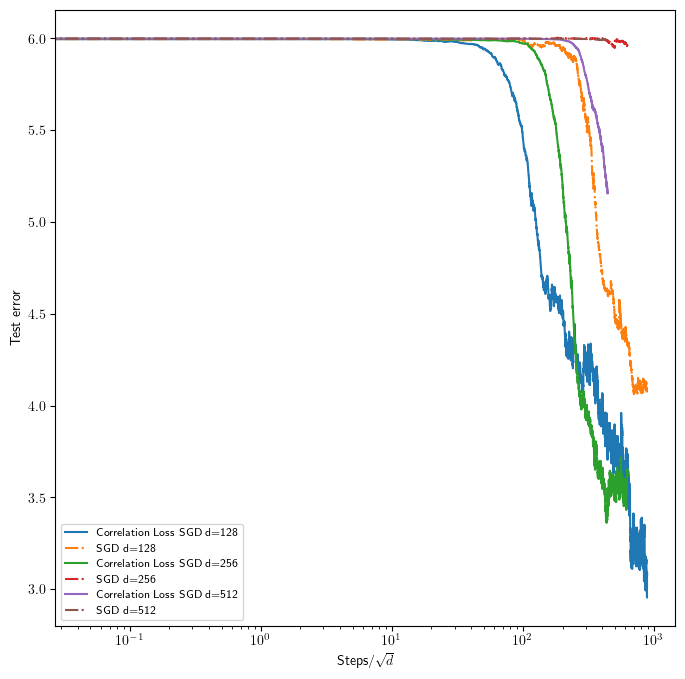

In [22]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

for i,d in zip(range(len(ds)),ds):
    # ax.plot(sim_adaptivesgd_test_errors/R0, label=f'Adaptive SGD', marker='', ls='-', color='green')
    cl = ax.plot(np.arange(T+1)/np.sqrt(d),np.mean(sim_correlationsgd_test_errors[i], axis =0), label=f'Correlation Loss SGD d={d}', marker='', ls='-')
    ax.plot(np.arange(T+1)/np.sqrt(d),np.mean(sim_plainsgd_test_errors[i], axis =0), label=f'SGD d={d}', marker='', ls='-.')

# ax.plot(theo_adaptivesgd_test_errors, label=f'Adaptive SGD Theory', marker='', linestyle='-', color='green')
# ax.plot(theo_correlationsgd_test_errors, label=f'Correlation Loss SGD Theory', marker='', linestyle='-', color='blue')
# ax.plot(theo_plainsgd_test_errors, label=f'SGD Theory', marker='', linestyle='-', color='red')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Steps/$\sqrt{d}$')
ax.set_ylabel('Test error')
# ax.set_xlim([0,110])
# ax.set_ylim([2,5])
ax.legend(fontsize=8, loc='lower left')

plt.savefig('figures/different_SGDs.pdf', bbox_inches = 'tight')

